In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np

time: 326 ms (started: 2023-04-16 12:13:33 -07:00)


Parameters:

* `perplexity=30`
* `learning_rate="auto"`: `"auto"` means use the method of Belkina and co-workers which scaled the learning rate with the size of the dataset.
* `early_exaggeration_iter=250`
* `early_exaggeration=12`
* `n_iter=500`
* `exaggeration=None`: amount of exaggeration to apply during the non-early part of the iteration. Can give a more UMAP-like appearance.
* `dof=1`: degrees of freedom in the heavy-tail parameterization: `100` for SNE-like behavior. `0.5` gives noticeably compressed clusters.
* `theta=0.5`: amount of approximation when using Barnes-Hut (`negative_gradient_method="bh"`). `0` is exact t-SNE. Typical values 0.2-0.8. Can be set to `"auto"`.
* `n_interpolation_points=3`: an FFT setting. Don't touch it.
* `min_num_intervals=50`: another FFT setting. The higher the value, the more accurate the gradient calculation.
* `ints_in_interval=1`: grid size length in FFT. Lower is more accurate.
* `initialization="pca"`: one of `"pca"`, `"spectral"` or `"random"`. Or a matrix.
* `metric="euclidean"`: metric to use with one of the nearest neighbor methods.
* `metric_params=None`
* `initial_momentum=0.5`
* `final_momentum=0.8`
* `max_grad_norm=None`: clips the gradient norm.
* `max_step_norm=5`: clips the update step size.
* `n_jobs=1`: `-1` means use all processors.
* `neighbors="auto"`: one of: `"exact"`, `"annoy"`, `"pynndescent"`", `"hnsw"`, `"approx"` (`"annoy"` if possible, `"pynndescent"` otherwise) or `"auto"` (`"exact"` if `N < 1000` and `"approx"` otherwise).
* `negative_gradient_method="auto"`: one of: `"bh"` (Barnes-Hut), `"fft"` (FFT interpolation) or `"auto"` (BH if `N < 10000`, FFT otherwise).
* `callbacks=None`: one or a list of functors that implement `def callback(iteration, error, embedding):`
* `callbacks_every_iters=50`: number of iterations between the `callbacks` being called.
* `random_state=None`
* `verbose=False`

In [2]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("tsne"),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
)

time: 7.1 s (started: 2023-04-16 12:13:33 -07:00)


[12:13:40] INFO     Using experiment name: experiment-20230416191340                                 ]8;id=375132;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=532884;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#41\41]8;;\

           INFO     Getting dataset s1k                                                              ]8;id=863442;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=573427;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#51\51]8;;\

           INFO     Embedding                                                                        ]8;id=505149;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=277850;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#54\54]8;;\

           INFO     Using precomputed knn                                                               ]8;id=82239;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=865512;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#192\192]8;;\

           INFO     Using k_neighbors (no self) = 90 with perplexity 30.00                              ]8;id=152398;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=68909;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#128\128]8;;\

           INFO     Found pre-calculated neighbors file: nn/s1k.150.euclidean.exact.faiss.idx.npy   ]8;id=185856;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=68594;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#295\295]8;;\

           INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=467908;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=5530;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

           INFO     Running t-SNE                                                                       ]8;id=34060;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=975755;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#222\222]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=316013;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=935251;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=730187;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=174309;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=356159;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=179470;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[12:13:41] INFO     Automatically determined negative gradient method `bh`                               ]8;id=299069;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=560255;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[12:13:43] INFO     Embedding completed                                                                 ]8;id=251689;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=891956;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#255\255]8;;\

           INFO     Evaluating                                                                       ]8;id=918586;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=280678;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#75\75]8;;\

           INFO     rte-5-euclidean                                                                  ]8;id=647410;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=298844;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#13\13]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=882021;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=36313;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                                 ]8;id=885232;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=558818;file:///home/james/dev/drnb/src/drnb/triplets.py#208\208]8;;\

           INFO     Also found corresponding euclidean distances                                    ]8;id=725390;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=431413;file:///home/james/dev/drnb/src/drnb/triplets.py#211\211]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=725469;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=387867;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

[12:13:44] INFO     rpc-5-euclidean                                                                  ]8;id=796976;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=698158;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#13\13]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=871018;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=196656;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                                 ]8;id=408921;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=965419;file:///home/james/dev/drnb/src/drnb/triplets.py#208\208]8;;\

           INFO     Also found corresponding euclidean distances                                    ]8;id=258566;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=500413;file:///home/james/dev/drnb/src/drnb/triplets.py#211\211]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=700728;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=545909;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                               ]8;id=260360;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=78581;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#13\13]8;;\

           INFO     Loading faiss with AVX2 support.                                                   ]8;id=838882;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=811039;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#54\54]8;;\

           INFO     Could not load library with AVX2 support due to:                                   ]8;id=588102;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=678916;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#58\58]8;;\
                    ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")                                  

           INFO     Loading faiss.                                                                     ]8;id=656896;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=54159;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#64\64]8;;\

           INFO     Successfully loaded faiss.                                                         ]8;id=458928;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=6751;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#66\66]8;;\

           INFO     Plotting                                                                         ]8;id=877735;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=95043;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#85\85]8;;\

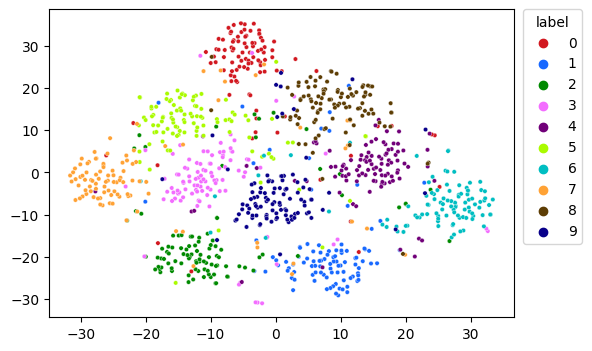

time: 4.76 s (started: 2023-04-16 12:13:40 -07:00)


In [3]:
embed_result = embed_pipeline.run("s1k")

[12:13:45] INFO     Using experiment name: experiment-20230416191345                                 ]8;id=894207;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=494387;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#41\41]8;;\

           INFO     Getting dataset s1k                                                              ]8;id=649927;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=194189;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#51\51]8;;\

           INFO     Embedding                                                                        ]8;id=596074;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=294154;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#54\54]8;;\

           INFO     Using precomputed knn                                                               ]8;id=701935;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=965544;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#192\192]8;;\

           INFO     Using k_neighbors (no self) = 90 with perplexity 30.00                              ]8;id=578384;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=511607;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#128\128]8;;\

           INFO     Found pre-calculated neighbors file: nn/s1k.150.euclidean.exact.faiss.idx.npy   ]8;id=191285;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=626868;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#295\295]8;;\

           INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=742564;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=935917;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

           INFO     Using 'spectral' initialization                                                     ]8;id=349671;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=166892;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#207\207]8;;\

           INFO     Running t-SNE                                                                       ]8;id=441137;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=994407;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#222\222]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=431492;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=33423;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=933671;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=952634;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[12:13:46] INFO     Automatically determined negative gradient method `bh`                               ]8;id=103676;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=382262;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[12:13:50] INFO     Embedding completed                                                                 ]8;id=777106;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=432026;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#255\255]8;;\

           INFO     Evaluating                                                                       ]8;id=828534;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=113782;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#75\75]8;;\

           INFO     rte-5-euclidean                                                                  ]8;id=725159;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=802648;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#13\13]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=133897;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=676938;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                                 ]8;id=189870;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=53894;file:///home/james/dev/drnb/src/drnb/triplets.py#208\208]8;;\

           INFO     Also found corresponding euclidean distances                                    ]8;id=147951;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=218431;file:///home/james/dev/drnb/src/drnb/triplets.py#211\211]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=579882;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=106095;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

           INFO     rpc-5-euclidean                                                                  ]8;id=712464;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=361279;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#13\13]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=221268;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=92130;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                                 ]8;id=493573;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=445997;file:///home/james/dev/drnb/src/drnb/triplets.py#208\208]8;;\

           INFO     Also found corresponding euclidean distances                                    ]8;id=20709;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=804259;file:///home/james/dev/drnb/src/drnb/triplets.py#211\211]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=627136;file:///home/james/dev/drnb/src/drnb/triplets.py\triplets.py]8;;\:]8;id=511807;file:///home/james/dev/drnb/src/drnb/triplets.py#196\196]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                               ]8;id=693975;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=329902;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#13\13]8;;\

           INFO     Plotting                                                                         ]8;id=98616;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=149988;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#85\85]8;;\

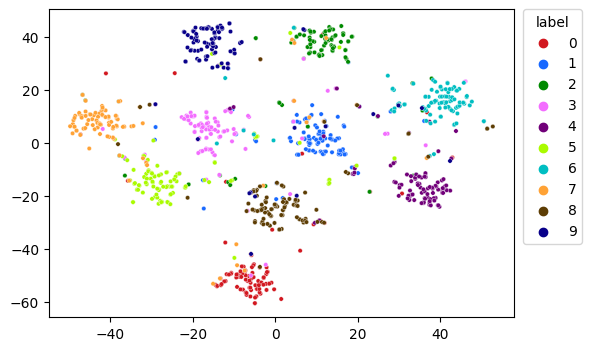

time: 6.06 s (started: 2023-04-16 12:13:45 -07:00)


In [4]:
embed_result_spectral = pl.create_pipeline(
    method=pl.embedder("tsne", initialization="spectral", params=dict(dof=0.7)),
    eval_metrics=[
        "rte",
        "rpc",
        ("nnp", dict(n_neighbors=[15, 50, 150])),
    ],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
).run("s1k")

To use the uniform affinity kernel, where [n_neighbors should be set roughly to perplexity / 3](https://twitter.com/hippopedoid/status/1232698023253303298), use the `affinity="uniform"` embedding method parameter. Additionally, for larger datasets, you can use [annealed early exaggeration](https://proceedings.mlr.press/v196/gonzalez-marquez22a.html) to slowly step down the exaggeration factor rather than the abrupt change with `anneal_exaggeration=True` (although not all `params` are supported).

[12:13:51] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=572982;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=210222;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

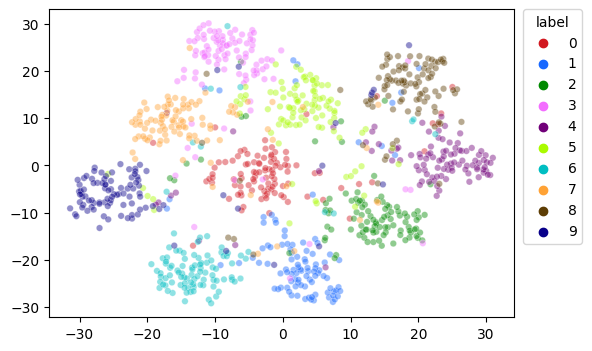

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=0.6063999999999998, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.322772980865914, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=0.43820000000000003, info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=0.4645000000000001, info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=0.49828666666666666, info={'metric': 'euclidean', 'n_neighbors': 150})]

time: 3.1 s (started: 2023-04-16 12:13:51 -07:00)


In [5]:
pl.standard_eval(
    method=("tsne", dict(affinity="uniform", n_neighbors=10, anneal_exaggeration=True)),
    dataset="s1k",
    params=dict(n_iter=2000),
)